# Descriptive Statistics

In [6]:
import numpy as np
import pandas as pd
import scipy
import os
# set up the working directory
os.chdir('/Users/deborah_j/Documents/CEU/datacamp-playground/Introduction_to_Statistics_in_Python/')


In [7]:
# load the file and delete first column
amir_deals_df = pd.read_csv('amir_deals.csv')
del amir_deals_df['Unnamed: 0']
amir_deals_df

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
173,Product A,Current,Lost,5835.32,23
174,Product D,Current,Won,6377.50,12
175,Product D,Current,Won,3537.61,28
176,Product A,Current,Won,6448.07,34


In [8]:
np.mean(amir_deals_df['amount'])

4812.000337078652

In [9]:
np.median(amir_deals_df['amount'])

4805.1900000000005

In [10]:
import statistics
statistics.mode(amir_deals_df['num_users'])

17

In [11]:
# by default, ascending is True
amir_deals_df['num_users'].sort_values()

85      1
29      1
123     1
151     2
91      2
       ..
63     94
120    96
133    98
107    99
40     99
Name: num_users, Length: 178, dtype: int64

In [12]:
# check roughly the distribution of the client column
amir_deals_df['client'].value_counts()

Current    145
New         33
Name: client, dtype: int64

In [13]:
# use aggregation function efficiently: dont forget [] within agg and no need for parentheses within agg
amir_deals_df.groupby('product')['amount'].agg([np.mean,np.median])


,mean,median
product,,
Product A,5228.240000,5597.340
Product B,4840.396452,4765.650
Product C,3386.596667,3579.630
Product D,5094.949000,4852.280
Product E,4894.302000,4823.990
Product F,4977.383636,5137.670
Product G,6671.095000,6671.095
Product H,4432.011250,4832.155
Product I,3915.044286,3220.450


<AxesSubplot:>

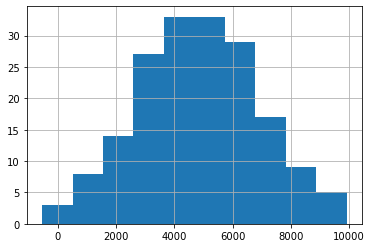

In [14]:
# visualize the distribution of the amount column: in jupyter notes book without plt.show() it still 
# shows the plot
import matplotlib.pyplot as plt
amir_deals_df['amount'].hist()

# clear the picture
# plt.clf()


In [15]:
# calculate the spread of the amount column
# without ddof=1, it calculates the population variance
print(np.var(amir_deals_df['amount'],ddof=1))
# standard deviation: two ways to calculate it
print(np.std(amir_deals_df['amount'],ddof=1))
print(amir_deals_df['amount'].std())

4236077.02557051
2058.17322535556
2058.17322535556


In [19]:
# mean absolute deviation.
# remember to import stats; importing scipy itself is not enough
from scipy import stats
stats.median_abs_deviation(amir_deals_df['amount'])
# Standard deviation vs. mean absolute deviation:
# Standard deviation squares distances, penalizing longer distances more than shorter ones. 
# Mean absolute deviation penalizes each distance equally.
# One isn't better than the other, but SD is more common than MAD.

1407.9649999999992

In [ ]:
# Quantiles: cut points dividing the range of a prob distri into continuous intervals with equal probs
print(np.quantile(amir_deals_df['num_users'],0.3))
# Quartiles: 3 points dividing the range of a prob distri into 4 intervals with equal probs
# still use quantile function, but turn the current argument into a list
print(np.quantile(amir_deals_df['num_users'], [0,0.25,0.5,0.75,1]))
# linspace is also good with [start, stop, num], meaning (num-1) spaces between start and stop
print(np.quantile(amir_deals_df['num_users'], np.linspace(0,1,5)))

17.0
[ 1.   14.25 32.5  58.   99.  ]
[ 1.   14.25 32.5  58.   99.  ]


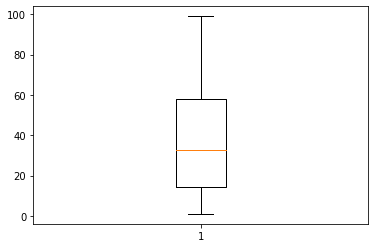

In [ ]:
# try boxplot
plt.boxplot(amir_deals_df['num_users'])
plt.show()

In [ ]:
# IQR: interquartile range, the height of the box in the box plot
# by definition, it is the difference between the 75th and 25th percentiles
print(np.quantile(amir_deals_df['num_users'],0.75) - np.quantile(amir_deals_df['num_users'],0.25))
# there is also a dedicated function for IQR
from scipy.stats import iqr
print(iqr(amir_deals_df['num_users']))
# IQR is a robust measure of spread, as it is not influenced by outliers; 
# and we can use IQR to find ourliers, e.g. Q1 - 1.5*IQR or Q3 + 1.5*IQR

43.75
43.75


In [ ]:
# an example of finding outliers
lower_bound = np.quantile(amir_deals_df['amount'],0.25) - 1.5*iqr(amir_deals_df['amount'])
upper_bound = np.quantile(amir_deals_df['amount'],0.75) + 1.5*iqr(amir_deals_df['amount'])
amir_deals_df[(amir_deals_df['amount'] < lower_bound) | (amir_deals_df['amount'] > upper_bound)]
# no outliers in this case? good... good

,product,client,status,amount,num_users


In [25]:
# all in one go
amir_deals_df['amount'].describe()

count     178.000000
mean     4812.000337
std      2058.173225
min      -539.230000
25%      3415.927500
50%      4805.190000
75%      6217.257500
max      9913.270000
Name: amount, dtype: float64

# Sampling and Distributions